In [53]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns 
import matplotlib.pyplot as plt

In [54]:
dataset = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')

In [55]:
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [57]:
dataset.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [58]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [59]:
dataset=dataset.apply(preprocessing.LabelEncoder().fit_transform)

In [60]:
preprocessing.OneHotEncoder().fit_transform(dataset)

<205x1269 sparse matrix of type '<class 'numpy.float64'>'
	with 5330 stored elements in Compressed Sparse Row format>

In [61]:
corr= dataset.corr()
corr.price.sort_values(ascending=False).head(10)

price         1.000000
curbweight    0.905891
horsepower    0.846130
enginesize    0.818392
carwidth      0.815487
carlength     0.802523
fuelsystem    0.707890
wheelbase     0.685544
boreratio     0.627766
drivewheel    0.600088
Name: price, dtype: float64

In [62]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<Axes: >

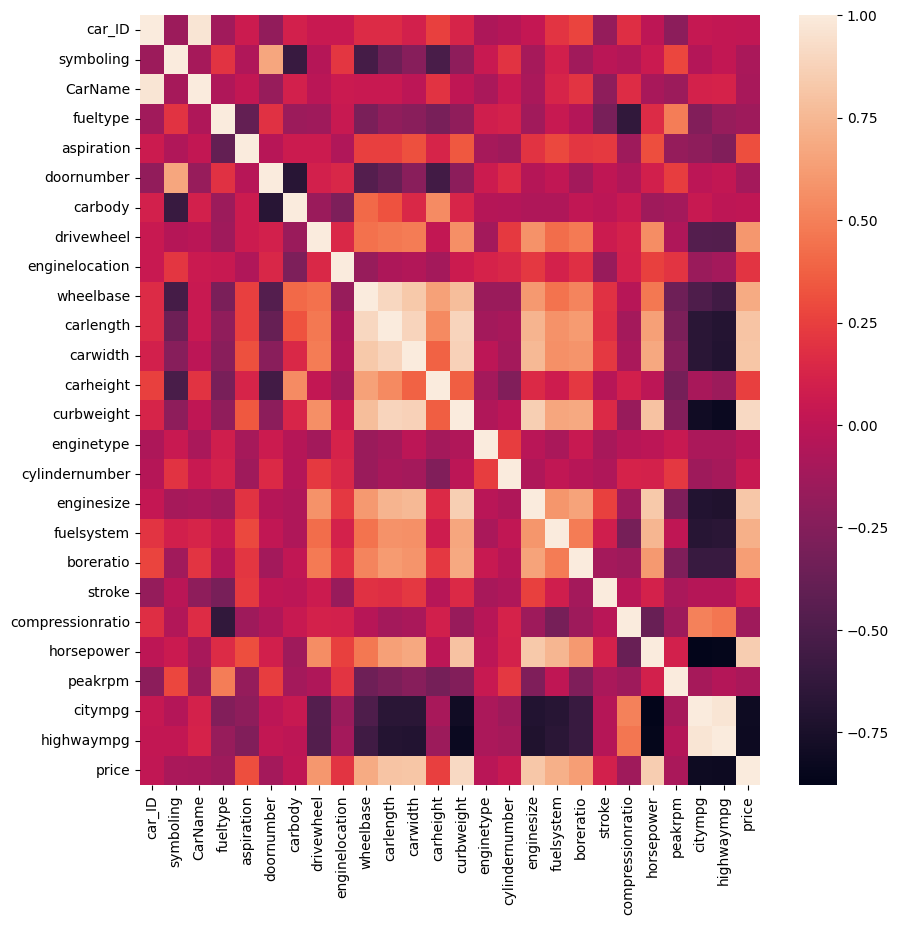

In [63]:

#ax = sns.heatmap(dataset.corr(), annot=True)
plt.subplots(figsize=(10,10))
sns.heatmap(corr)

OLS model with columns of maximun correlation with price

In [64]:
X=dataset.loc[:,['drivewheel','wheelbase','carlength','carwidth','curbweight','enginesize','fuelsystem','boreratio','horsepower']].values
#y=dataset['price']
X = np.append(arr=np.ones((len(X), 1)).astype(int), values=X, axis=1)  # appended ones at front of the matrix
Y = dataset['price'].values.reshape(-1, 1)

from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20)
x_train = np.array(x_train, dtype=float)
new_x_opt = x_train[:, [0,1,2,3,4,5,6,7,8]]
ols = OLS(endog=y_train, exog=new_x_opt)
model = ols.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     117.7
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           7.29e-62
Time:                        19:17:08   Log-Likelihood:                -728.21
No. Observations:                 164   AIC:                             1474.
Df Residuals:                     155   BIC:                             1502.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5100      4.735     -0.953      0.3

In [65]:
model.params

array([-4.50998529, 11.23662746, -0.23851888, -0.22373238,  1.29021948,
        0.65284547,  0.23334401,  4.43017964, -0.01857371])

In [66]:
x_test = np.array(x_test, dtype=float)
new_x_test = x_test[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]]
predictions = model.predict(new_x_test)

print(predictions)

[ 31.27407712  41.31366545  69.5156693   28.67997341 154.04247933
 120.53772856 157.44372175  26.0126734   60.23178527  37.14968635
 145.47048208 164.05961351 112.70358292  52.73337503 133.18963085
  71.87321489  29.39681154  28.75558526 108.87155367 142.34426137
  24.70698247  15.79063976  88.1713911   29.57905545 112.50492187
  87.21789847  91.4894343   44.24108794  29.31554071 152.62516769
  18.48068246 115.76914922 111.41769437  21.35372003  63.27987203
  92.33456358  28.89072664  78.26966553 121.39887912 128.15503624
 137.45573239]


In [67]:
real_values = [value[0] for value in y_test]  
predicted_values = predictions

In [68]:
data = [(r, p) for r, p in zip(real_values, predicted_values)]
df = pd.DataFrame(data=data, index=range(0, len(predicted_values)), columns=['Real_values', 'Predicted_values'])

In [69]:
df.head()

,Real_values,Predicted_values
0,9,31.274077
1,41,41.313665
2,67,69.515669
3,34,28.679973
4,122,154.042479


Linear Regression Model

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [71]:
dataset.drop(['CarName', 'car_ID'], axis=1, inplace=True)
car_df = pd.get_dummies(dataset, drop_first=True)
x = car_df.drop('price', axis=1)
y = car_df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [72]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred= model1.predict(X_test)

In [74]:
print('R-squared score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))

R-squared score: 0.8750161784198314
Mean squared error: 348.6427048768197
